In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import os
from Poincare import *
from Poincare import Section
import math
from surface_dynamics.all import *
from time import time

In [3]:
def load_arrays_from_file(file_path):
    # Load arrays from the NumPy file
    arrays_list = np.load(file_path, allow_pickle=True)
    
    # Ensure each element in the list is a NumPy array
    arrays_list = [np.array(array) for array in arrays_list]
    
    return arrays_list

In [4]:
vecs0 = load_arrays_from_file(os.path.join("vecs", "vecs7-4.npy"))

KeyboardInterrupt: 

In [ ]:
slopes = []
for vec in vecs0:
    if vec[0] == 0:
        continue
    slope = vec[1] / vec[0]
    slopes.append(slope)

In [ ]:
len(vecs0)

In [ ]:
len(slopes)

In [ ]:
def compute(seq):
    gaps = list()
    for i in range(0,len(seq) - 1):
        gap = seq[i+1] - seq[i]
        gaps.append(abs(gap))
    return gaps

In [ ]:
def graphing_dict(gaps_list, binwidth):
    #Create a dictionary
    bins_dict = {}
    #Create bins of width "binwidth" to add slope differences
    bins = list(np.arange(0, 1, binwidth))
    for bin in bins:
        bins_dict[bin] = 0
    #add slope gaps to respective bins
    for gap in gaps_list:
        for bin in bins:
            if gap < bin:
                bins_dict[bin] += 1
                break
    return bins_dict

In [ ]:
def plot_distribution(slopes, binwidth):
    gaps = compute(slopes)
    gaps_dict = graphing_dict(gaps, binwidth)
    # this for-loop finds the smallest gap. By multiplying by 4, we find the second non-differentiable point and by multiplying by 8, we         get a good window of the distribution
    for bin in gaps_dict.keys():
        if gaps_dict[bin] != 0:
            bound = int(bin*8/binwidth)
            break
    plt.scatter(list(gaps_dict.keys())[:bound], list(gaps_dict.values())[:bound], s = 5)

In [ ]:
plot_distribution(slopes, 0.0000001)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import time
#!/bin/env -S sage -python
from flatsurf import *
from sage.all import *
import sys
import pandas as pd
import re
import os

def load_arrays_from_file(file_path):
    # Load arrays from the NumPy file
    arrays_list = np.load(file_path, allow_pickle=True)
    
    # Ensure each element in the list is a NumPy array
    arrays_list = [np.array(array) for array in arrays_list]
    
    return arrays_list

def compute(seq):
    gaps = list()
    for i in range(0,len(seq) - 1):
        gap = seq[i+1] - seq[i]
        gaps.append(abs(gap))
    return gaps

def graphing_dict(gaps_list, points):
    #Create a dictionary
    bins_dict = {}
    #Create bins of width "binwidth" to add slope differences
    bins = list(np.arange(0, min(gaps_list)*10, min(gaps_list)*10/points))
    for bin in bins:
        bins_dict[bin] = 0
    #add slope gaps to respective bins
    for gap in gaps_list:
        for bin in bins:
            if gap < bin:
                bins_dict[bin] += 1
                break
    return bins_dict

def plot_distribution(slopes, binwidth):
    fig, ax = plt.subplots(figsize=(10, 10))
    gaps = compute(slopes)
    gaps_dict = graphing_dict(gaps, binwidth)
    for bin in gaps_dict.keys():
        if gaps_dict[bin] != 0:
            bound = int(bin*8/binwidth)
            break
    ax.scatter(list(gaps_dict.keys())[:bound], list(gaps_dict.values())[:bound], s = 5)
    plt.savefig(os.path.join("gaps", f"{n_squares} - {index}"))

def slopes(vecs):
    slopes = set()
    for vec in vecs:
        if vec[0] == 0:
            continue
        x = vec[0][0]
        y = vec[1][0]
        #if x <= 1000 and y <= 1000:
        slopes.add(y/x)
    slopes = list(slopes)
    slopes.sort()
    return slopes

In [2]:
n_squares = 7
index = 4
path = "vecs7-4.npy"

vecs = load_arrays_from_file(os.path.join("vecs", path))

In [3]:
len(vecs)

3618904

In [4]:
slopes = slopes(vecs)

In [5]:
len(slopes)

1632723

In [6]:
gaps = compute(slopes)

In [7]:
len(gaps)

1632722

In [8]:
a = list(sorted(gaps))
factor = 1/min(a)
b = []
for item in a:
    b.append(item*factor)

In [15]:
dx = 0.2
times = list(np.arange(0, 8, dx))
cdf = [0]
#compute cdf
for t in times:
    num = cdf[-1]
    for i in range(num, len(b)):
        if b[i] <= t:
            num += 1
            continue
        else:
            cdf.append(num)
            break

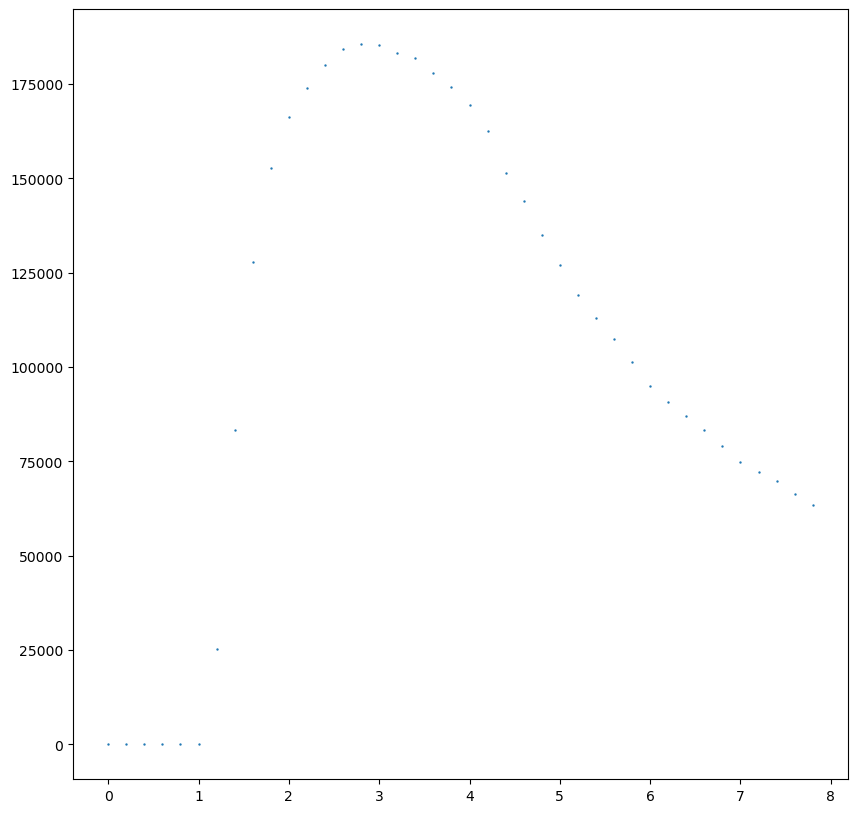

In [16]:
#compute pdf
pdf = []
for i in range(len(cdf) - 1):
    delta = (cdf[i+1] - cdf[i])/dx
    pdf.append(delta)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(times, pdf, s = 0.5)

In [53]:
from scipy import integrate

i = 0
j = 0
points_top = [0, 1, 3, 5]
points_bottom = [0, 1, 2, 4, 5]
top = [10, 11, 12]
bottom = [20, 21, 22, 23]

all_points = []
for item in points_top:
    all_points.append(item)
for item in points_bottom:
    all_points.append(item)
    
all_points = set(all_points)
all_points = list(all_points)
all_points.sort()

sum = 0
for k in range (1, len(all_points)):
    if (not(all_points[k-1] >= points_top[i] and all_points[k] <= points_top[i+1])):
        i += 1
    if (not(all_points[k-1] >= points_bottom[j] and all_points[k] <= points_bottom[j+1])):
        j += 1
    top_eq = top[i]
    bottom_eq = bottom[j]
    upper = all_points[k]
    lower = all_points[k-1]
    
    # Define the integrand function
    def integrand(vec):
        return vec[1][0]/(x*(vec[0][0]*x + vec[1][0]*y))
    
    # Define the bounds functions
    def y_lower(y):
        return bottom_eq
    
    def y_upper(y):
        return top_eq
    
    def x_lower():
        return lower
    
    def x_upper():
        return upper
    
    # Perform the double integral
    result, error = integrate.dblquad(integrand, x_lower, x_upper, y_lower, y_upper)

0 1 20 10
1 2 21 11
2 3 22 11
3 4 22 12
4 5 23 12


In [51]:
all_points

[0, 1, 2, 3, 4, 5]